In [71]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import copy

In [72]:
def stationary_distribution(A):
    n = len(A)
    M1 = np.vstack(((A.transpose() - np.eye(n))[:-1],np.ones(n)))
    v1 = np.eye(n)[-1]
    p = np.linalg.solve(M1,v1)
    return p

In [73]:
E = np.array([[1/6,1/6,1/6,1/6,1/6,1/6],[0.1,0.1,0.1,0.1,0.1,0.5]])
A = np.array([[0.95,0.05],[0.1,0.9]])
s = stationary_distribution(A)
L = 300
M = 2 #number of states
K = 6 #number of possible emissions

In [74]:
def HMM(E, A, L):
    dices = [0, 1]
    score = [0, 1, 2, 3, 4, 5]
    vec_sost, Path = np.zeros(L, dtype=np.int), np.zeros(L, dtype=np.int)
    vec_sost[0] = np.random.choice(dices, 1, p = s)
    for i in range(1, L):
        vec_sost[i] = np.random.choice(dices, 1, p = A[int(vec_sost[i-1])])
        Path[i] = np.random.choice(score, 1, p = E[int(vec_sost[i-1])])
    return(Path, vec_sost)

# Viterbi

In [75]:
def viterby (Path, A, E):
    V_matr = np.zeros((2, L))
    P_matr = [[],[]]

    V_matr[0][0] = s[0]*E[0][Path[0]-1]
    V_matr[1][0] = s[1]*E[1][Path[0]-1]

    for i in range (1,L):
        for j in range(2):
            V_matr[j][i] = E[j][Path[i]-1]*max(A[0][j]*V_matr[0][i-1], A[1][j]*V_matr[1][i-1])
            P_matr[j].append(np.argmax([A[0][j]*V_matr[0][i-1], A[1][j]*V_matr[1][i-1]]))
    P_matr = np.array(P_matr)
    
    P_vec = np.zeros(L)
    P_vec[-1] = np.argmax([A[0][0]*V_matr[0][-1],A[1][0]*V_matr[1][-1]])
    for i in range(L-2,-1,-1):
        P_vec[i] = P_matr[int(P_vec[i+1])][i]
    return(P_vec)


def translation(l):
    L = len(l)
    c = ''
    dec = {0:'F', 1:'L'}
    for i in range(L):
        if l[i]!=-1:
            c += dec[l[i]]
        else:
            c += "o"
    return c

In [76]:
Path, vec_sost = HMM(E,A,L)   
print("Наблюдения:", Path, "Состояния: ", vec_sost, sep = '\n')

Наблюдения:
[0 4 2 2 5 2 0 5 1 1 0 3 3 1 1 4 3 1 0 2 2 2 5 1 2 3 0 2 0 0 5 5 5 5 5 5 5
 0 1 2 4 4 2 4 4 1 3 4 0 0 4 3 5 5 1 2 0 5 0 0 2 1 0 2 2 3 4 3 4 0 4 2 3 2
 5 2 3 4 5 5 1 2 2 2 4 4 5 5 1 1 1 5 0 1 2 5 4 1 3 1 2 4 1 3 4 3 1 1 4 3 2
 4 0 5 5 5 5 5 5 2 5 5 5 0 5 5 2 5 4 5 5 5 0 5 4 2 4 2 3 5 3 4 5 5 3 1 0 5
 3 5 2 2 3 5 5 5 5 4 5 2 5 1 1 5 5 5 5 1 1 3 0 2 3 4 5 4 2 5 2 5 2 5 2 4 4
 4 3 4 5 5 5 3 5 2 5 5 1 3 2 5 5 4 4 5 5 5 5 5 5 3 5 2 3 5 5 1 4 5 1 1 2 0
 3 2 5 5 0 5 1 1 5 4 0 2 4 2 3 0 3 1 5 5 5 0 5 5 3 5 5 5 5 2 5 1 2 5 4 0 2
 0 5 2 4 4 3 3 0 3 4 0 4 5 4 3 1 3 4 3 4 4 2 0 1 5 4 5 4 3 5 2 4 4 3 0 2 5
 2 5 1 5]
Состояния: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [77]:
P_vec = viterby (Path, A, E)

summ=0
for i in range(L):
    if translation(vec_sost)[i] == translation(P_vec)[i]:
        summ+=1
print('Частота совпадения:', summ/L)
print(translation(vec_sost),"_"*100, translation(P_vec), sep='\n')

Частота совпадения: 0.5366666666666666
FFFFFFFFFFFFFLLFFFFFFFFFFFFFLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLFFFFLFFFFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLFFFFFFFFFFFFFF
____________________________________________________________________________________________________
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF


In [78]:
#Алгоритм прямого распространения
def Forward_algoritm(obs_seq, transit, emis, pi):
    L = len(obs_seq) 
    M = len(emis)
    forw = np.zeros((M, L))
    scaling = np.zeros(L)
    forw[:,0] = pi*emis[:, obs_seq[0]-1]
    scaling[0] = max(forw[:, 0])
    forw[:, 0] /= scaling[0]
    for i in range(1, L):
        for j in range(M):
            forw[j,i] = emis[j, obs_seq[i]]*sum(forw[:, i-1]*transit[:, j])
        scaling[i] = max(forw[:,i])
        forw[:,i] /= scaling[i]
    proba = sum(forw[:,-1]) 
    return forw, proba, scaling

In [79]:
#Алгоритм обратного распространения
def Backward_algoritm(obs_seq, A, E, X):
    L = len(obs_seq) 
    M = len(E)
    back = np.zeros((M, L))
    scaling = np.zeros(L)
    back[:,-1] = np.array([1,1])
    scaling[-1] = 1
    for i in range(L-2, -1, -1):
        for j in range(M):
            back[j,i] = sum(back[:,i+1]*A[j]*E[:,obs_seq[i+1]])
        scaling[i] = max(back[:,i])
        back[:,i] /= scaling[i]
    proba = sum(back[:,0]*X*E[:,obs_seq[0]-1])
    return back, proba, scaling

In [80]:
forw, prob_forw, m_f = Forward(Path, A, E, s)
back, prob_back, m_b = Backward(Path, A, E, s)
print(prob_forw,prob_back)

1.690143776026618 0.17614854790626824


In [81]:
def find_posterior(F, B, P, m_f, m_b):
    L = len(F)
    Result = np.zeros(L)
    for i in range(L):
        Result[i] = np.log(F[i]) + sum(np.log(m_f[:i+1])) + np.log(B[i]) + sum(np.log(m_b[i:])) - np.log(P) - sum(np.log(m_f))
    return np.exp(Result)

In [82]:
post_prob = find_posterior(forw[0],back[0], prob_forw, m_f, m_b)

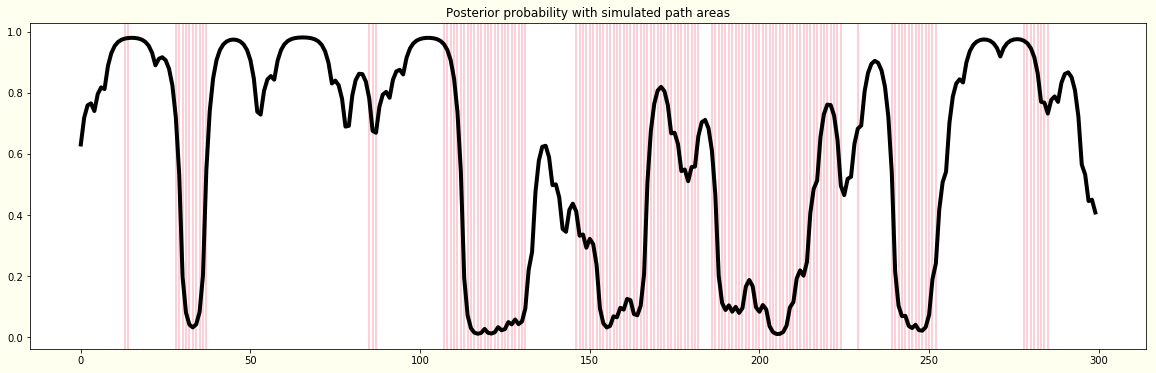

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6),facecolor="ivory")
for i in range(L):
    if vec_sost[i] == 0:
        plt.axvline(x = i, color = 'white')
    else:
        plt.axvline(x = i, color = 'pink')
plt.plot(range(L), post_prob, color = 'black', linewidth = 4)
plt.title('Posterior probability with simulated path areas')
plt.show()

In [84]:
# Функция нахождения суммы двух чисел в логарифмическом пространстве
# Входные параметры: логарфмы двух чисел
# Выходной параметр: логарифм суммы двух чисел
def logsum(x,y):
     return x + np.log(1 + np.exp(y-x))

# Функция нахождения суммы координат вектора в логарифмическом пространстве
# Входные параметры: логарфмы двух чисел
# Выходной параметр: логарифм суммы двух чисел
def logsum_n(vect):
    result = vect[0]
    for i in range(1,len(vect)):
        result = logsum(result, vect[i])
    return result

# Функция нормирования матриц по строкам (сумма по строке матрицы равна 1)
# Входные параметры: матрица
# Выходной параметр: нормированная по строкам матрица
def norm_matrix(x):
    return (x.transpose()/sum(x.transpose())).transpose()

# Функция создания п последовательностей наблюдей
# Входные параметры: число последовательностей, длина постедовательностей, матрица переходных вероятностей, матрица эмиссий 
# Выходной параметр: массив последовательностей наблюдений
def Rolls_create(n, L, A, E):
    Rolls_all = np.zeros(((n, L)), dtype=int)
    for i in range(n):
        Rolls_all[i] = HMM(E,A,L)[0]
    return Rolls_all

# Алгоритм Баума-Велша нахождения параметров задачи
# Входные параметры: массив последовательностей наблюдений, первоначальная матрица переходных вероятностей, 
# первоначальная матрица эмиссий, точность поиска (пороговое значение логарифма максимального правдоподобия)
# Выходной параметр: итоговая матрица переходных вероятностей, итоговая матрица эмиссийб время работы алгоритма, число итераций
def Baum_Welch(Rolls_all, A0, E0, eps, max_iter):
    L = len(Rolls_all[0])
    M = len(E0)
    R = len(E0.transpose())
    n = len(Rolls_all)
    t = len(eps)
    start_time = time.time()
    time_all = np.zeros(t)
    iterations = np.zeros((t,), dtype = int)
    A_finished = []
    E_finished = []
    A_all = []
    E_all = []
    A_all.append(A0)
    E_all.append(E0)
    X = stationary_distribution(A0)
    i = 0
    q = 0
    while(1):
        resultA1 = np.zeros((M,M))
        resultE1 = np.zeros((M,R))
        Q = 0
        for j in range(n):
            resultA2 = np.zeros((M,M))
            resultE2 = np.zeros((M,R))
            Forward, P_x_1, m_f = Forward_algoritm(Rolls_all[j], A_all[i], E_all[i], X)
            Backward, P_x_2, m_b = Backward_algoritm(Rolls_all[j], A_all[i], E_all[i], X)
            log_P_x = np.log(P_x_1) + sum(np.log(m_f))
            for k in range(L-1):
                log_sum = (np.zeros((M,M)) + (np.log(Forward[:,k])).reshape(M,1) + sum(np.log(m_f[:k+1])) + np.log(A_all[i]) + 
                           + np.log(Backward[:,k+1]) + sum(np.log(m_b[k+1:])) + np.log(E_all[i][:, Rolls_all[j][k+1]-1]) - log_P_x)
                if k == 0:
                    resultA2 = log_sum
                else:
                    resultA2 = logsum(resultA2, log_sum)
            for k in range(L):
                log_sum = (np.log(Forward[:,k]) + sum(np.log(m_f[:k+1])) + np.log(Backward[:,k]) + sum(np.log(m_b[k:])) - log_P_x)
                if (resultE2[:, Rolls_all[j][k]-1] == np.zeros(M)).all():
                    resultE2[:, Rolls_all[j][k]-1] = log_sum                
                else:
                    resultE2[:, Rolls_all[j][k]-1] = logsum(resultE2[:, Rolls_all[j][k]-1], log_sum)
            
            if j == 0 :
                resultA1 = copy.deepcopy(resultA2)
                resultE1 = copy.deepcopy(resultE2)
            else:
                resultA1 = logsum(resultA1, resultA2)
                resultE1 = logsum(resultE1, resultE2)
        resultA1 = norm_matrix(np.exp(resultA1))
        X = stationary_distribution(resultA1)
        resultE1 = norm_matrix(np.exp(resultE1))
        A_all.append(np.array(resultA1))
        E_all.append(np.array(resultE1))
        if ((abs(np.log(A_all[-1]/A_all[-2])) < np.ones((M,M))*eps[q]).all() and 
            (abs(np.log(E_all[-1]/E_all[-2])) < np.ones((M,R))*eps[q]).all()):
            time_all[q] = (time.time()-start_time)/60
            iterations[q] = i + 1
            A_finished.append(A_all[-1])
            E_finished.append(E_all[-1])
            if (q == t-1) or (max_iter<=iterations[q]): 
                break
            q += 1
        i += 1
    return A_finished, E_finished, time_all, iterations

# Функция печати результатов алгоритма Баума-Велша
# Входные параметры: результаты алгоритма Baum_Welch
# Выходной параметр: иллюстрация результатов алгоритма Baum_Welch
def print_Baum_Welch(BW, eps):
    for i in range(len(BW[0])):  
        print('eps =', eps[i])
        print('A:', np.around(BW[0][i], decimals = 2), sep = '\n')
        print('E:', np.around(BW[1][i], decimals = 2), sep = '\n')
        print('Время выполнения (в минутах):', BW[2][i])
        print('Число итераций:', BW[3][i])
        print('')

In [85]:
def init_radn_val(M,K):
    A_new = np.zeros((M,M))
    E_new = np.zeros((M,K))
    
    for i in range(M):
        A_new[i][i] = np.random.random()
        for j in range(K-1):
            summ_E = 1-sum(E_new[i])
            E_new[i][j] = np.random.uniform(0,summ_E)
    for i in range(M):
        E_new[i][K-1]=1-sum(E_new[i])
    A_new[0][1]=1-A_new[0][0]
    A_new[1][0]=1-A_new[1][1]
    return(A_new, E_new)
    
A0, E0 = init_radn_val(M,K)
s0 = stationary_distribution(A0)
print("Матрица вероятностей переходов А:",A0,"Эмиссионная матрица Е:",E0,"Вектор стац. распределения матрицы А:", s0,sep="\n")

Матрица вероятностей переходов А:
[[0.53835004 0.46164996]
 [0.65166255 0.34833745]]
Эмиссионная матрица Е:
[[0.10308654 0.54497201 0.1562628  0.12779169 0.04619401 0.02169296]
 [0.02495586 0.80762967 0.01105129 0.11246795 0.03499013 0.0089051 ]]
Вектор стац. распределения матрицы А:
[0.58533659 0.41466341]


In [86]:
n = 3
L = 300
eps = np.array([1.e-1,1.e-2])
max_iter = 100
Rolls_all = Rolls_create(n, L, A, E)
BW = Baum_Welch(Rolls_all, A0, E0, eps, max_iter)
print_Baum_Welch(BW, eps)

eps = 0.1
A:
[[0.65 0.35]
 [0.8  0.2 ]]
E:
[[0.14 0.14 0.14 0.14 0.3  0.14]
 [0.13 0.14 0.13 0.13 0.32 0.15]]
Время выполнения (в минутах): 0.5970850110054016
Число итераций: 216

